#                          Merry Christmas sibs! 

### As I may or may not have told you both, I plan on looking for a new job this spring and have been working on some personal projects to strengthen my resume. Since I'm into data analysis, I thought it'd be a fun project and solid supplmental Christmas gift to analyze our Neflix data!

### Is this an invasion of your viewing habits?  

## **Yes**

###  Will I uncover some wonderful but perhaps embarrasing things? 

## **Yes**

### Will I focus mostly on watched The Office episodes because it gives me a trove of useable GIFs and because it will be removed from Netflix in 2021?

## **Absolute and definitive Yes**.

<div style="width:80%;height:0;padding-bottom:58%;position:relative;"><iframe src="https://giphy.com/embed/yltGOJQBMBn7W" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/the-office-happy-yes-yltGOJQBMBn7W">via GIPHY</a></p>

### Some of this stuff requires I show the code in order to see the actual results. I'll try and not get too in-the-weeds

<div style="width:80%;height:0;padding-bottom:56%;position:relative;"><iframe src="https://giphy.com/embed/5wWf7H89PisM6An8UAU" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/editingandlayout-the-office-michael-scott-5wWf7H89PisM6An8UAU">via GIPHY</a></p>

### Alright, let's get to it.

### First let's take a look how much viewing data Netflix was able to give us:

In [4]:
netflix = pd.read_csv('C:/Users/U385722/Desktop/ViewingActivity.csv')
netflix.shape

(27082, 10)

###  27K rows and 10 columns of viewing data. Oh, this is going to be fun. 

### Here's a snippet of what the dataset looks like:

In [5]:
netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Anil,2020-11-25 07:04:44,00:00:14,NaN,The Office (U.S.): Season 3: Business School (...,NaN,Apple iPad mini,00:00:14,00:00:14,US (United States)
1,Anil,2020-11-25 01:26:38,00:00:01,Autoplayed: user action: None;,Screwed,NaN,Samsung 2015 NT14M DTV Smart TV,00:00:01,00:00:01,US (United States)
2,Anil,2020-11-25 01:21:20,00:01:45,Autoplayed: user action: None;,Gilmore Girls: Season 5: Emily Says 'Hello' (E...,NaN,Samsung 2015 NT14M DTV Smart TV,00:01:45,00:01:45,US (United States)
3,Anil,2020-11-25 00:39:46,00:37:31,Autoplayed: user action: Unspecified;,Gilmore Girls: Season 5: The Party's Over (Epi...,NaN,Samsung 2015 NT14M DTV Smart TV,00:43:16,00:43:16,US (United States)
4,Anil,2020-11-25 00:39:12,00:00:10,NaN,Survivor: Season 28: Cagayan: Hot Girl With a ...,NaN,Samsung 2015 NT14M DTV Smart TV,00:00:10,00:00:10,US (United States)


### Seems like most of the Countries are USA, which makes sense. Did any of us do any international watching?

In [8]:
netflix.Country.unique()

array(['US (United States)', 'CA (Canada)'], dtype=object)

### Canada...of course. Sidenote, we need to travel more after COVID y'all. Let's see what those occurances were:

In [9]:
netflix[netflix.Country == "CA (Canada)"]

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8229,Arzu,2019-07-10 12:46:52,00:33:35,NaN,Aziz Ansari: RIGHT NOW,NaN,Apple iPhone X (CDMA),00:32:24,Not latest view,CA (Canada)
13089,Arzu,2017-06-28 22:02:31,00:53:27,NaN,House of Cards: Season 5: Chapter 65 (Episode 13),NaN,Apple iPhone 6,00:53:28,00:53:28,CA (Canada)


### Interestingly, only two instances and both by Zoo. First she caught some Aziz Ansari standup on her iPhone two summers ago and then she watched House Of Cards back in the summer of 2017. That show really did not age well...

<div style="width:80%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/k7LbHJIqXobSJIKXV2" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-the-office-tv-boys-and-girls-k7LbHJIqXobSJIKXV2">via GIPHY</a></p>

### The next step in this analysis required me to convert the time features to the proper format. But instead of going through all that, let's just take a look at the final data types for each of these columns...

In [10]:
netflix.dtypes


Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

### Profile Name...Object. Start Time...Object. Duration...Object.

![Object](https://d12qk6n9ersps4.cloudfront.net/1576347/medium-clean.jpg)

## **Too Easy**

### Alright, now let's drill into only The Office watches:

In [18]:
#filter down to a new dataframe called office using string contains
office = netflix[netflix['Title'].str.contains('The Office (U.S.)', regex=False)]
office.head()
office.shape

(8518, 10)

### 8,518 views between the three of us. Not too shabby. After reviewing, I noticed that the durations included those with 1-10 seconds. Which signals to me that it's counting when you scroll onto The Office and it autoplays the preview. Let's fix that by removing anything watched less than a minute:

In [19]:
office = office[(office['Duration']> '0 days 00:01:00')]
office.shape

(7586, 10)

### That shaved off about 1,000 watches. Now I shall institute a very complex mathematical concept in this next step. I call it:

## **Division**.

In [20]:
7586/27082

0.2801122516800827

### Office episodes make up almost 30% of the all our Netflix show watches

### Now to get into some actual incriminating stuff. How much time did we watch The Office in total? 

In [21]:
office['Duration'].sum()

Timedelta('103 days 08:38:14')

### Oh, just a casual 103 days or 2,472 hours. What about the breakdown between all of us?

In [25]:
print(f"Anil watched The Office for a total of {[office_nil['Duration'].sum()]}")
print(f"Adil watched The Office for a total of {[office_dil['Duration'].sum()]}")
print(f"Arzu watched The Office for a total of {[office_arzu['Duration'].sum()]}")

Anil watched The Office for a total of [Timedelta('47 days 20:22:32')]
Adil watched The Office for a total of [Timedelta('49 days 03:18:13')]
Arzu watched The Office for a total of [Timedelta('6 days 08:55:12')]


## Folks

## We have an imposter among us 

![object](https://th.bing.com/th/id/OIP.mcavik1eQvHNV5OZ3qSL0wHaEI?pid=Api&rs=1)

<div style="width:75%;height:0;padding-bottom:56%;position:relative;"><iframe src="https://giphy.com/embed/muGYyrWwxOOMo" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/the-office-muGYyrWwxOOMo">via GIPHY</a></p>

## Only 6 days Zoo? I'm speechless. 

### Nevertheless, we must move forward. I wonder what day we typically watch The Office:

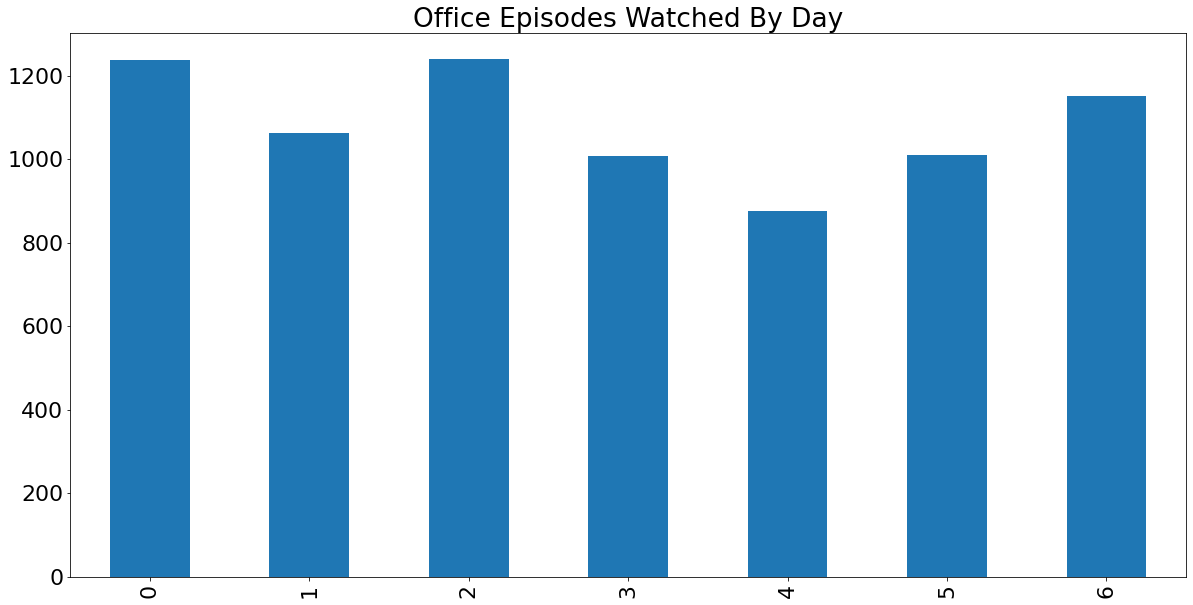

In [28]:
office_by_day.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Day')

### The way I coded this, 0 equals Monday, 1 equals Tuesday, and so on. Our most popular day to watch The Office was Wednesday, although it's fairly evenly spread. Maybe we should go more granular. Let's loook at it by hour: 

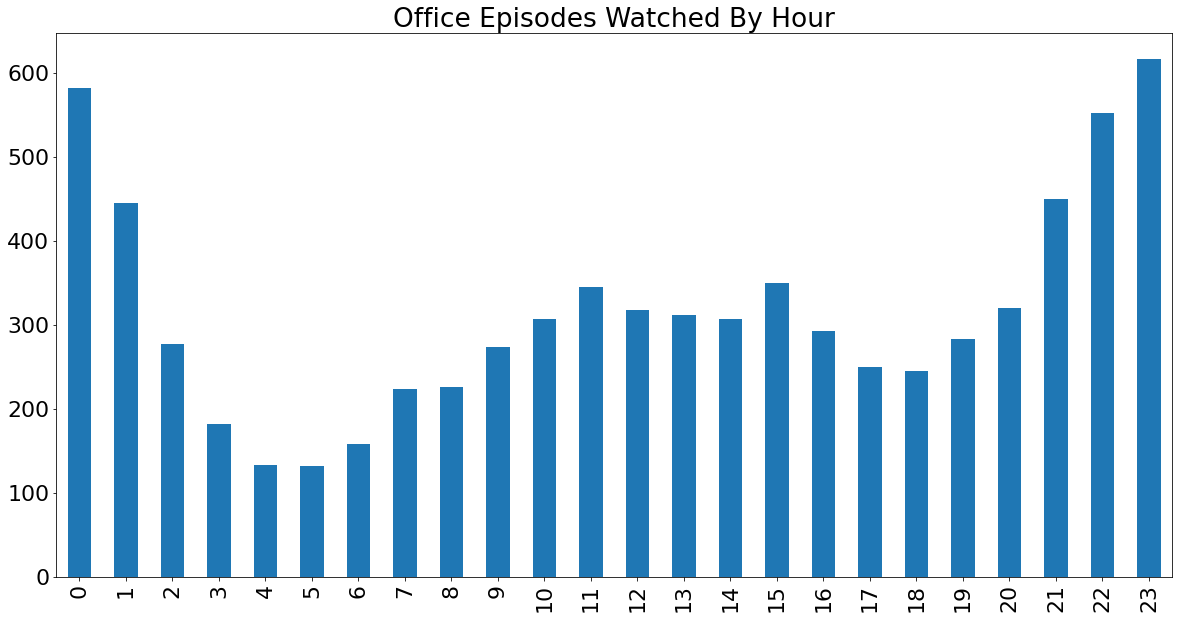

In [29]:
office['hour'] = pd.Categorical(office['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


office_by_hour = office['hour'].value_counts()

office_by_hour.head()

office_by_hour = office_by_hour.sort_index()

office_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour')

### We mostly tend to watch the most Office between 9 PM & 1 AM. That checks out. If you both are anything like me, this is generally how I'm watching The Office after 10 PM

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/dV8K4Rwzeuvn3JyJO9" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-the-office-diwali-tv-dV8K4Rwzeuvn3JyJO9">via GIPHY</a></p>

### You know the drill. Let's see how it is for each of us:

In [30]:
office_dil = office[(office['Profile Name'] == 'Adil')]
office_nil = office[(office['Profile Name'] == 'Anil')]
office_arzu = office[(office['Profile Name'] == 'Arzu')]

<ipython-input-31-dd70335ccfd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_nil['hour'] = pd.Categorical(office_nil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


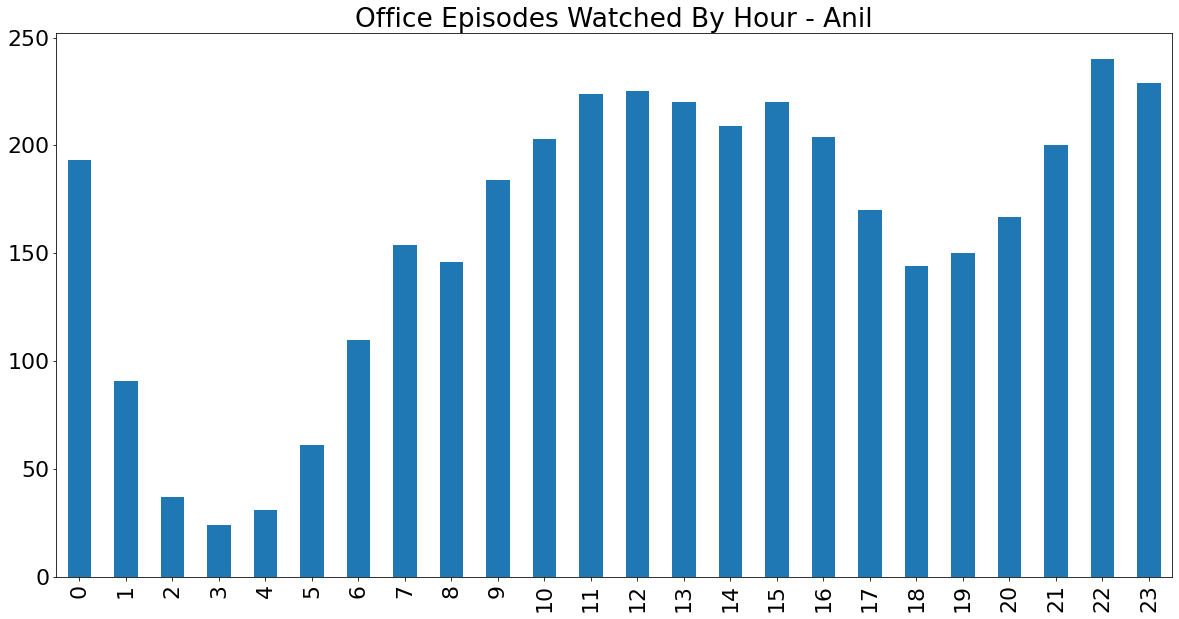

In [31]:
office_nil['hour'] = pd.Categorical(office_nil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

nil_by_hour = office_nil['hour'].value_counts()

nil_by_hour = nil_by_hour.sort_index()

nil_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour - Anil')

### Anil tends to watch either late at night or during the times of 10 AM - 3 PM. Something tells me Anil is fairly good at watching The Office and working. I also suspect this is how Anil would be looking at me right now:

<div style="width:75%;height:0;padding-bottom:60%;position:relative;"><iframe src="https://giphy.com/embed/4DKJDEsK22SR2" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/the-office-4DKJDEsK22SR2">via GIPHY</a></p>

### Alright let's see how it looks for me:

<ipython-input-32-8fad3c56dfe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_dil['hour'] = pd.Categorical(office_dil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


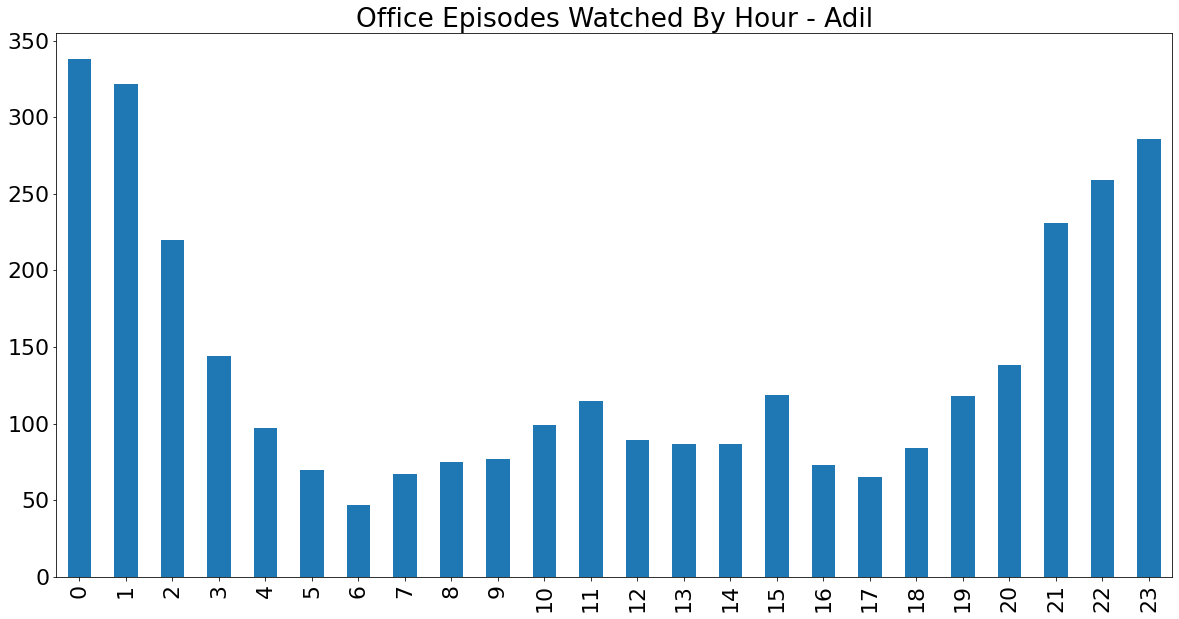

In [32]:
office_dil['hour'] = pd.Categorical(office_dil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

dil_by_hour = office_dil['hour'].value_counts()

dil_by_hour = dil_by_hour.sort_index()

dil_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour - Adil')

### I will be retaining my nightowl status

### Zoo?

<ipython-input-33-329d7bdee8b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_arzu['hour'] = pd.Categorical(office_arzu['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


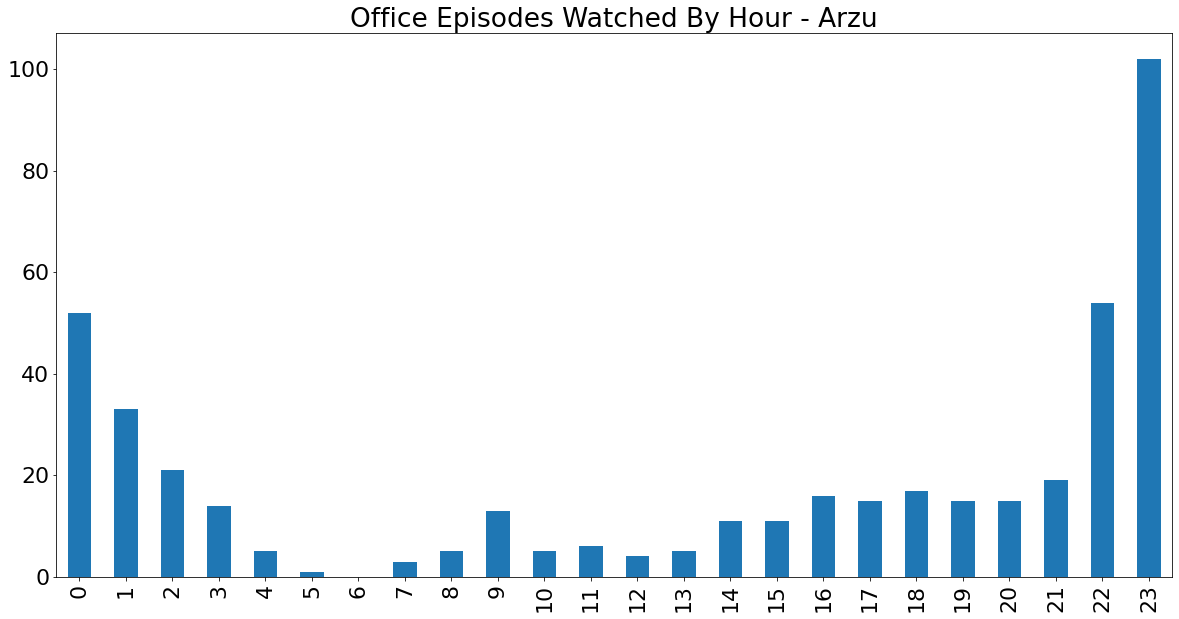

In [33]:
office_arzu['hour'] = pd.Categorical(office_arzu['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

arzu_by_hour = office_arzu['hour'].value_counts()

arzu_by_hour = arzu_by_hour.sort_index()

arzu_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour - Arzu')

### If it's not 11 PM or 12 AM, Zoo is NOT interested in watching The Office

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/O1oJ840fg6uOVCqdzJ" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-the-office-tv-casino-night-O1oJ840fg6uOVCqdzJ">via GIPHY</a></p>

### How about the top 15 Office episodes we all tend to watch over and over?

In [35]:
netflix['Title'].value_counts().head(15)

The Office (U.S.): Season 4: Dunder Mifflin Infinity (Episode 2)    114
The Office (U.S.): Season 4: Launch Party (Episode 3)                94
The Office (U.S.): Season 3: The Return (Episode 13)                 83
The Office (U.S.): Season 3: Traveling Salesmen (Episode 12)         83
The Office (U.S.): Season 4: Branch Wars (Episode 6)                 82
The Office (U.S.): Season 3: Beach Games (Episode 22)                81
The Office (U.S.): Season 3: A Benihana Christmas (Episode 10)       80
The Office (U.S.): Season 4: Money (Episode 4)                       79
The Office (U.S.): Season 3: Women's Appreciation (Episode 21)       79
The Office (U.S.): Season 4: Local Ad (Episode 5)                    77
The Office (U.S.): Season 2: Email Surveillance (Episode 9)          77
The Office (U.S.): Season 2: Drug Testing (Episode 20)               76
The Office (U.S.): Season 5: Stress Relief: Part 2 (Episode 15)      76
The Office (U.S.): Season 3: Product Recall (Episode 20)        

### I approve of the top 15. Our top two were Dunder Mifflin Infinity...

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/5cBBUJGiIniZZWtBSa" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-5cBBUJGiIniZZWtBSa">via GIPHY</a></p>

### and Launch Party (or was it Lanch party?)

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/ED1nge1yi8cGoSYvlb" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-ED1nge1yi8cGoSYvlb">via GIPHY</a></p>

### Alright Zoo... top 5 episodes?

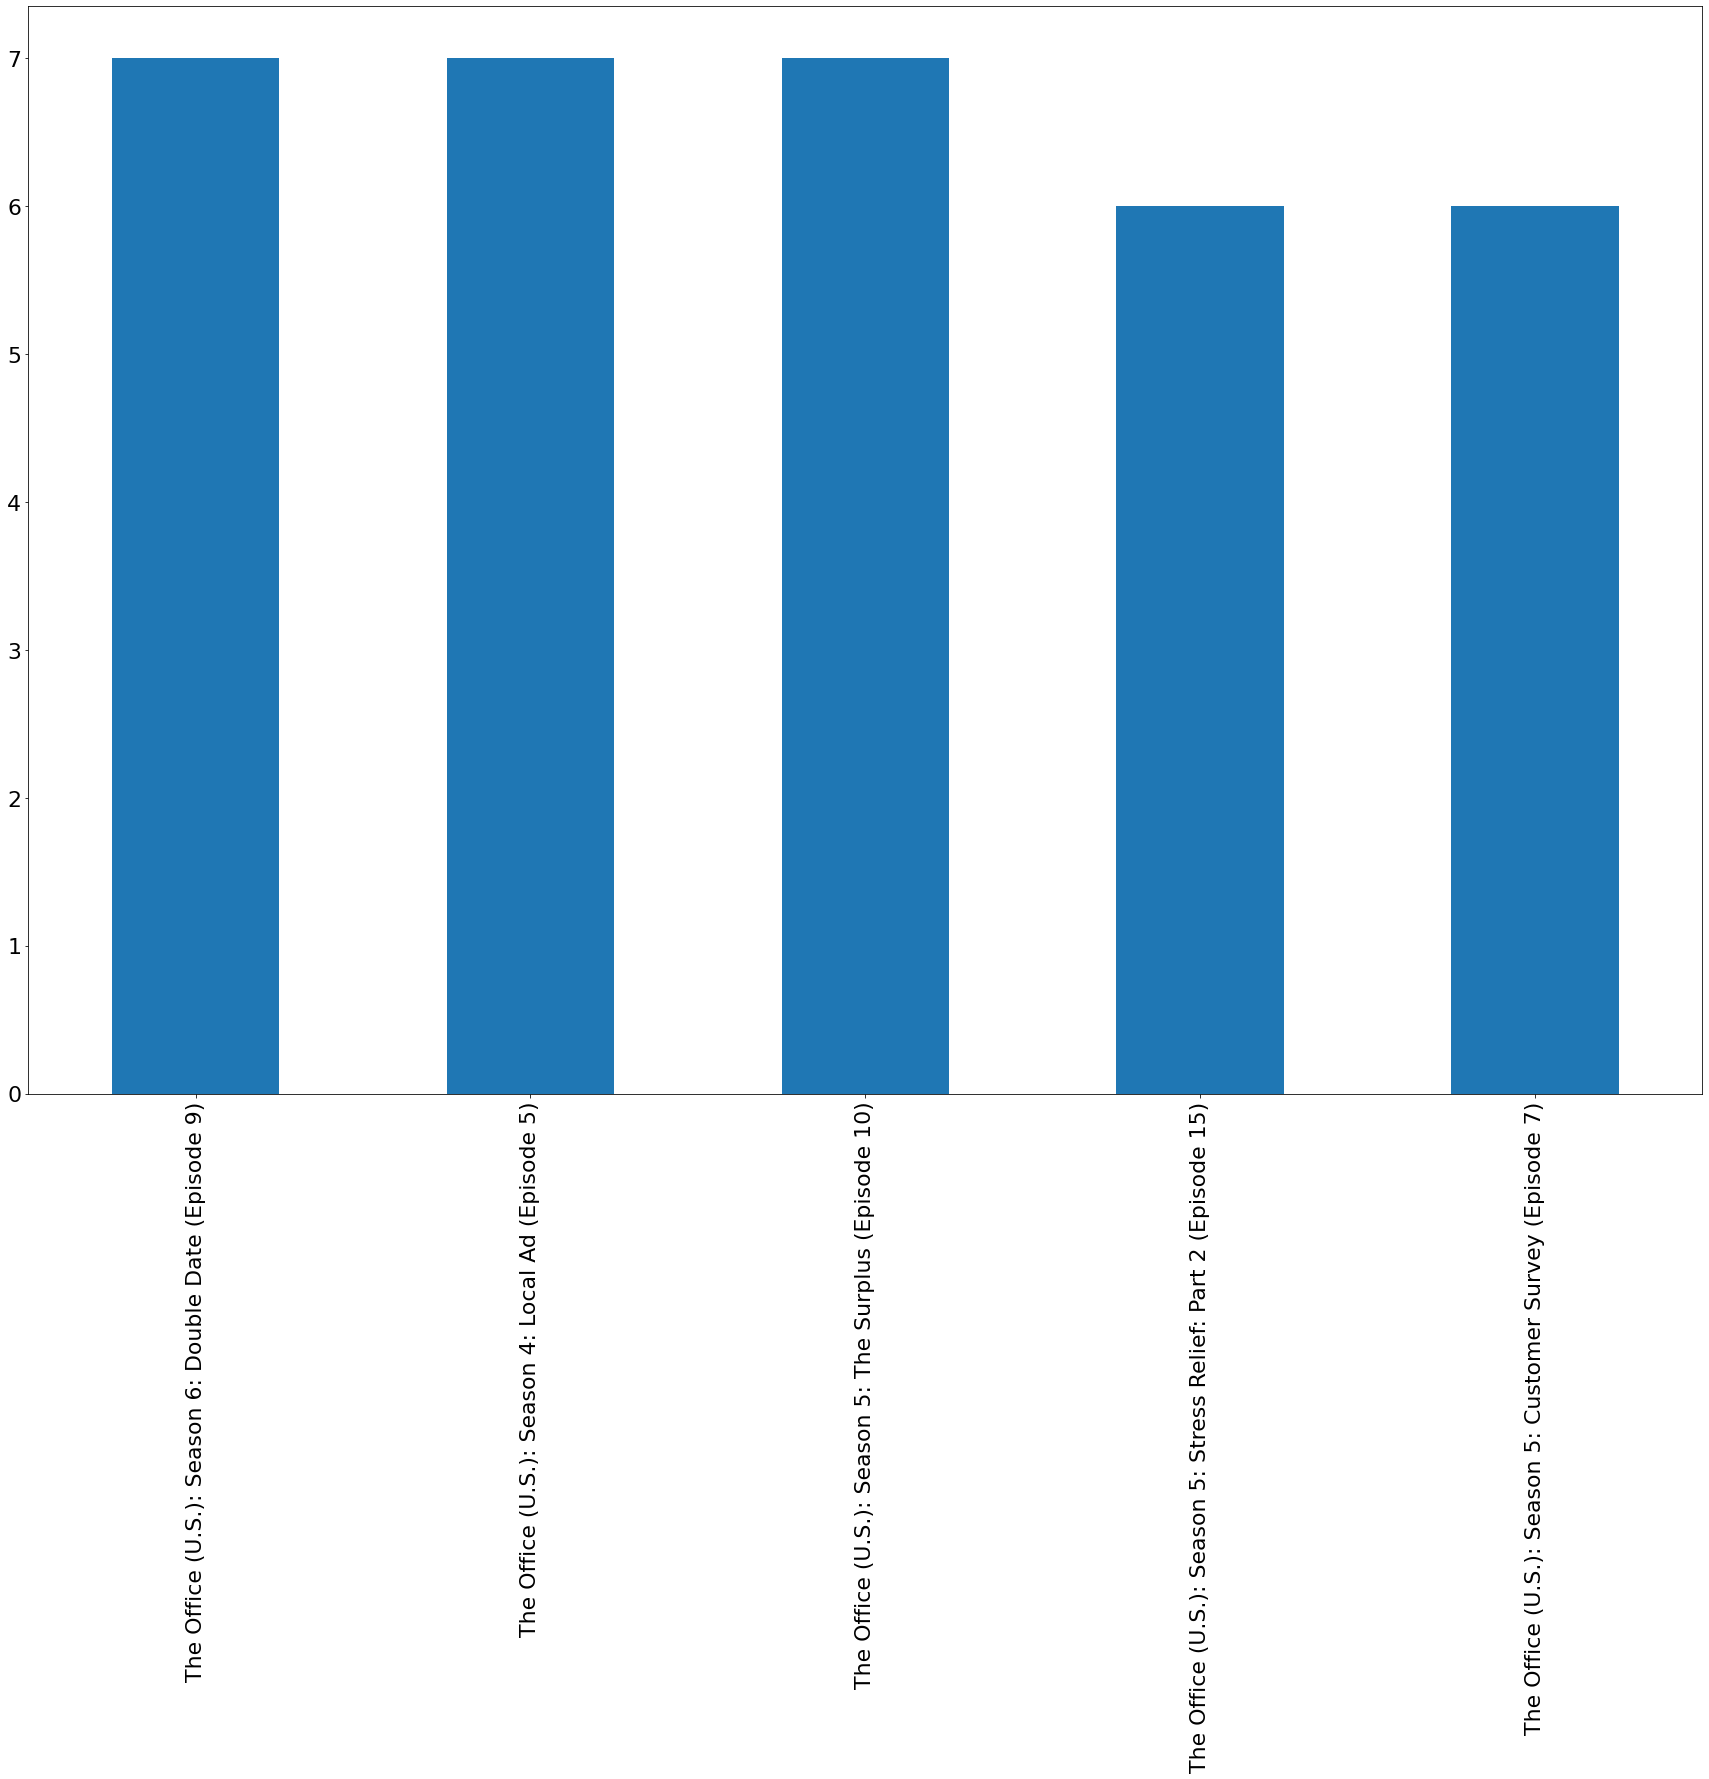

In [47]:
office_arzu['Title'].value_counts().sort_values(ascending=False).head().plot(kind='bar', figsize=(30,20))

### Double Date is your most watched, Zoo. Didn't see that coming but a good episode! Gotta love a little Bob & Phyllis Vance

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/WVbhbpdDehJxtD0rFa" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-nbc-the-office-tv-WVbhbpdDehJxtD0rFa">via GIPHY</a></p>

## Nil & I's look pretty similar

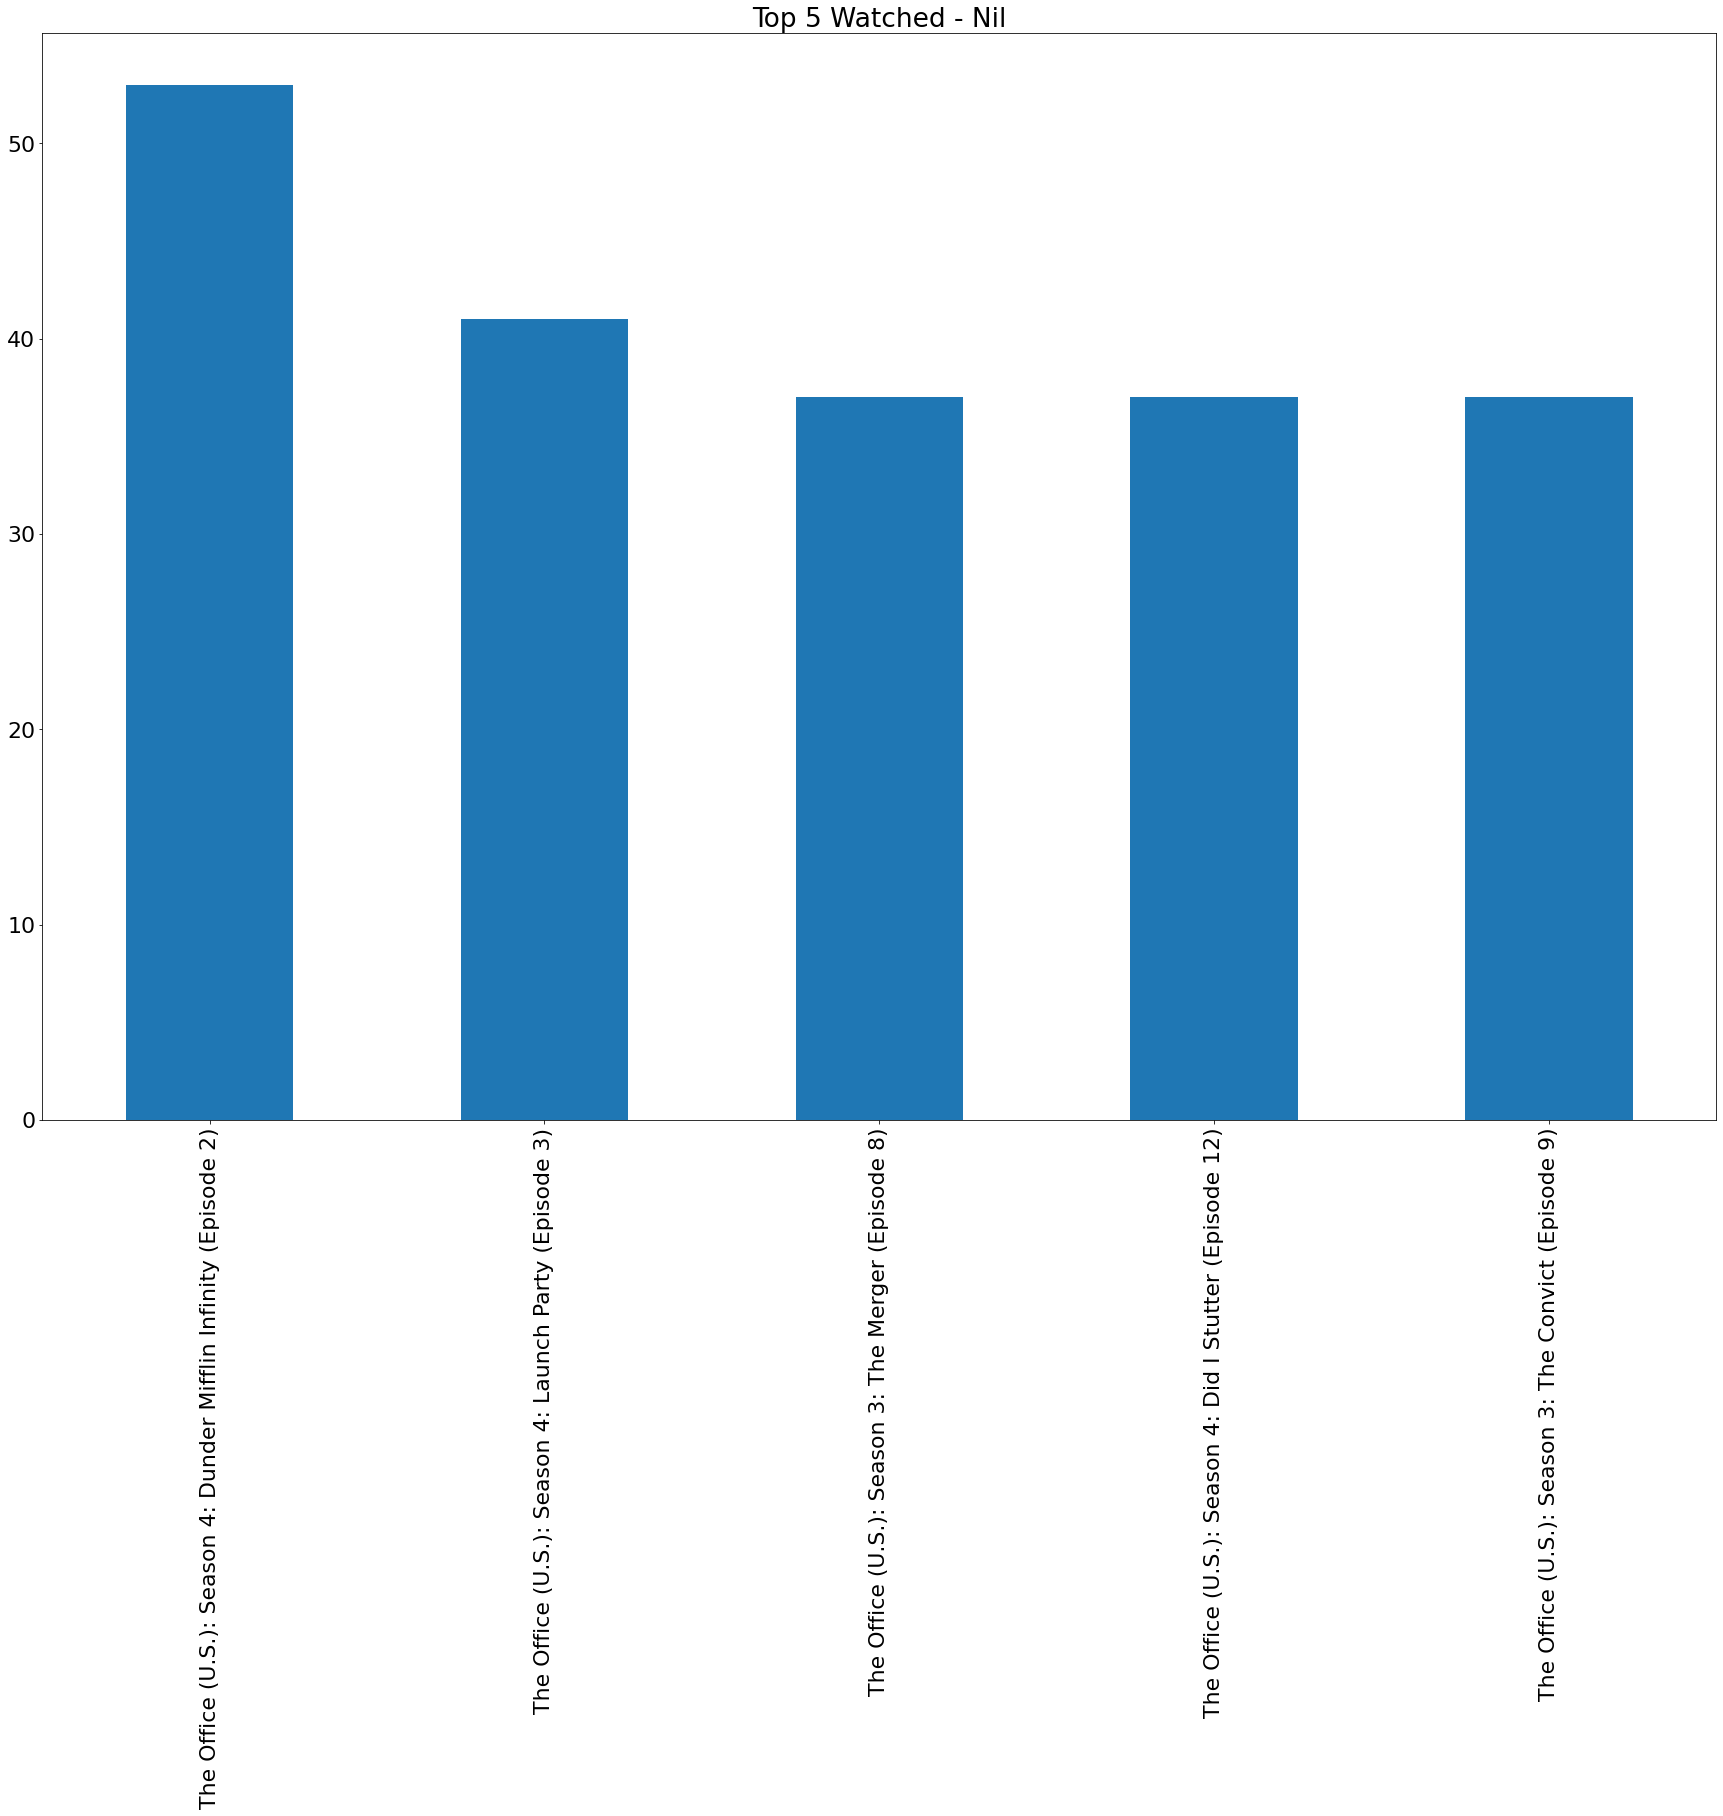

In [46]:
office_nil['Title'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(30,20), title = 'Top 5 Watched - Nil')

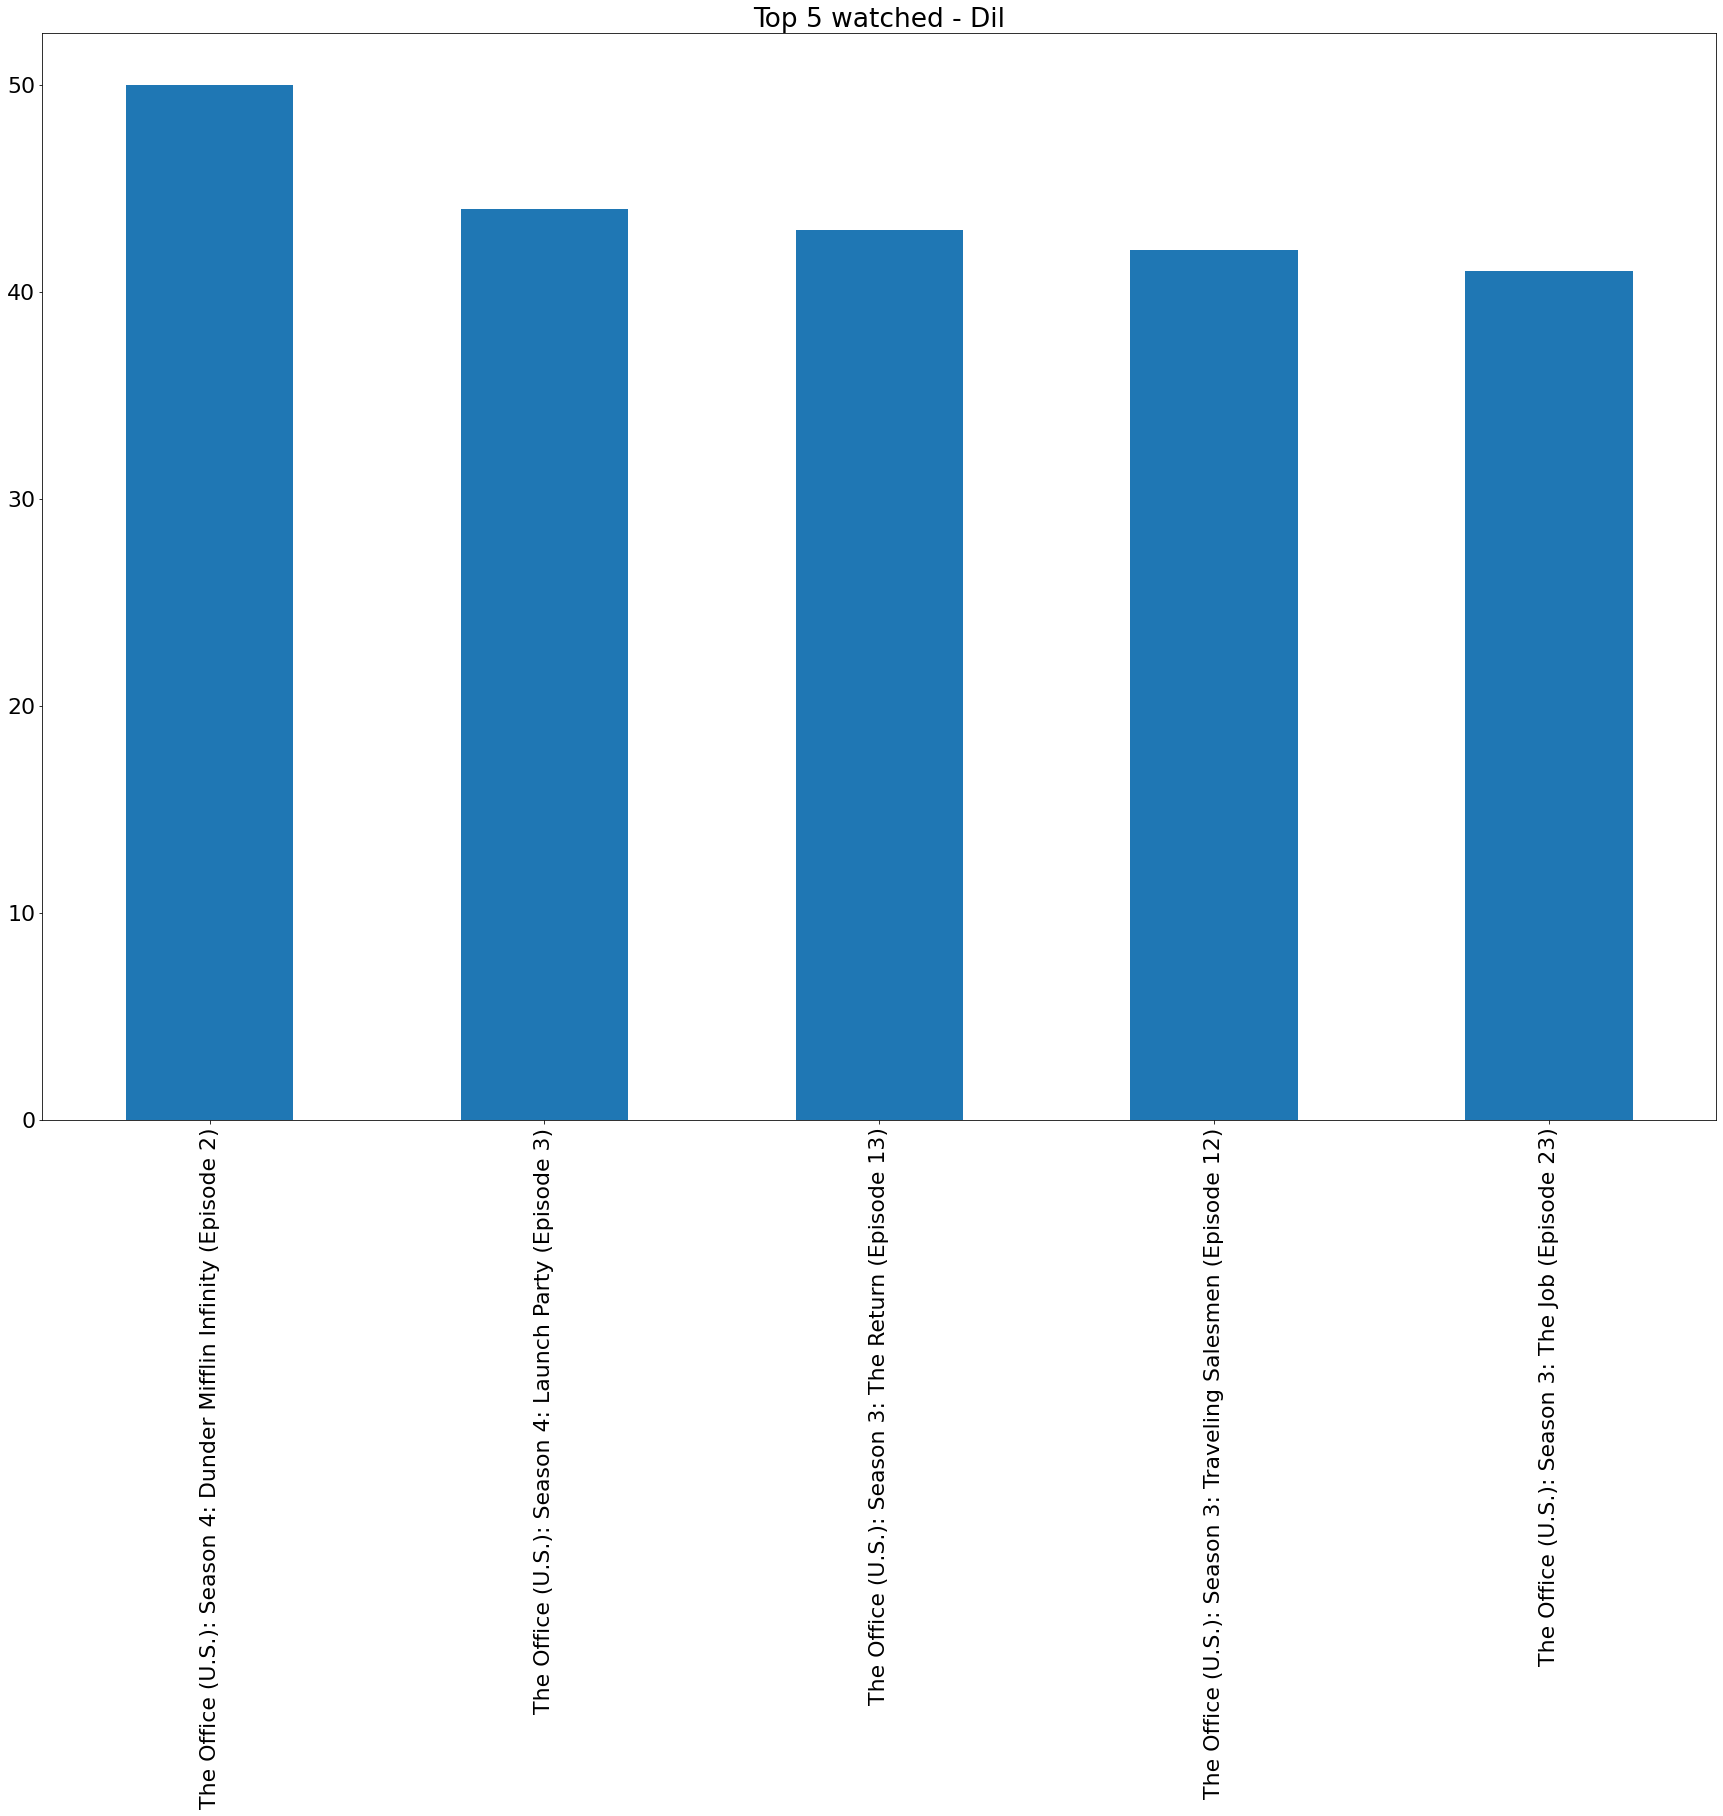

In [50]:
office_dil['Title'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(30,20), title = 'Top 5 watched - Dil')

### Super surprised that we didn't see much more of The Convict in our watching trends. That episode is classic!

<div style="width:75%;height:0;padding-bottom:46%;position:relative;"><iframe src="https://giphy.com/embed/H2aFIRFDWMY0g" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/harry-potter-amazing-the-office-H2aFIRFDWMY0g">via GIPHY</a></p>

### Okay time to start wrapping this thing up. Let's take a stepback and look at our top episodes, not only just The Office, but all shows:

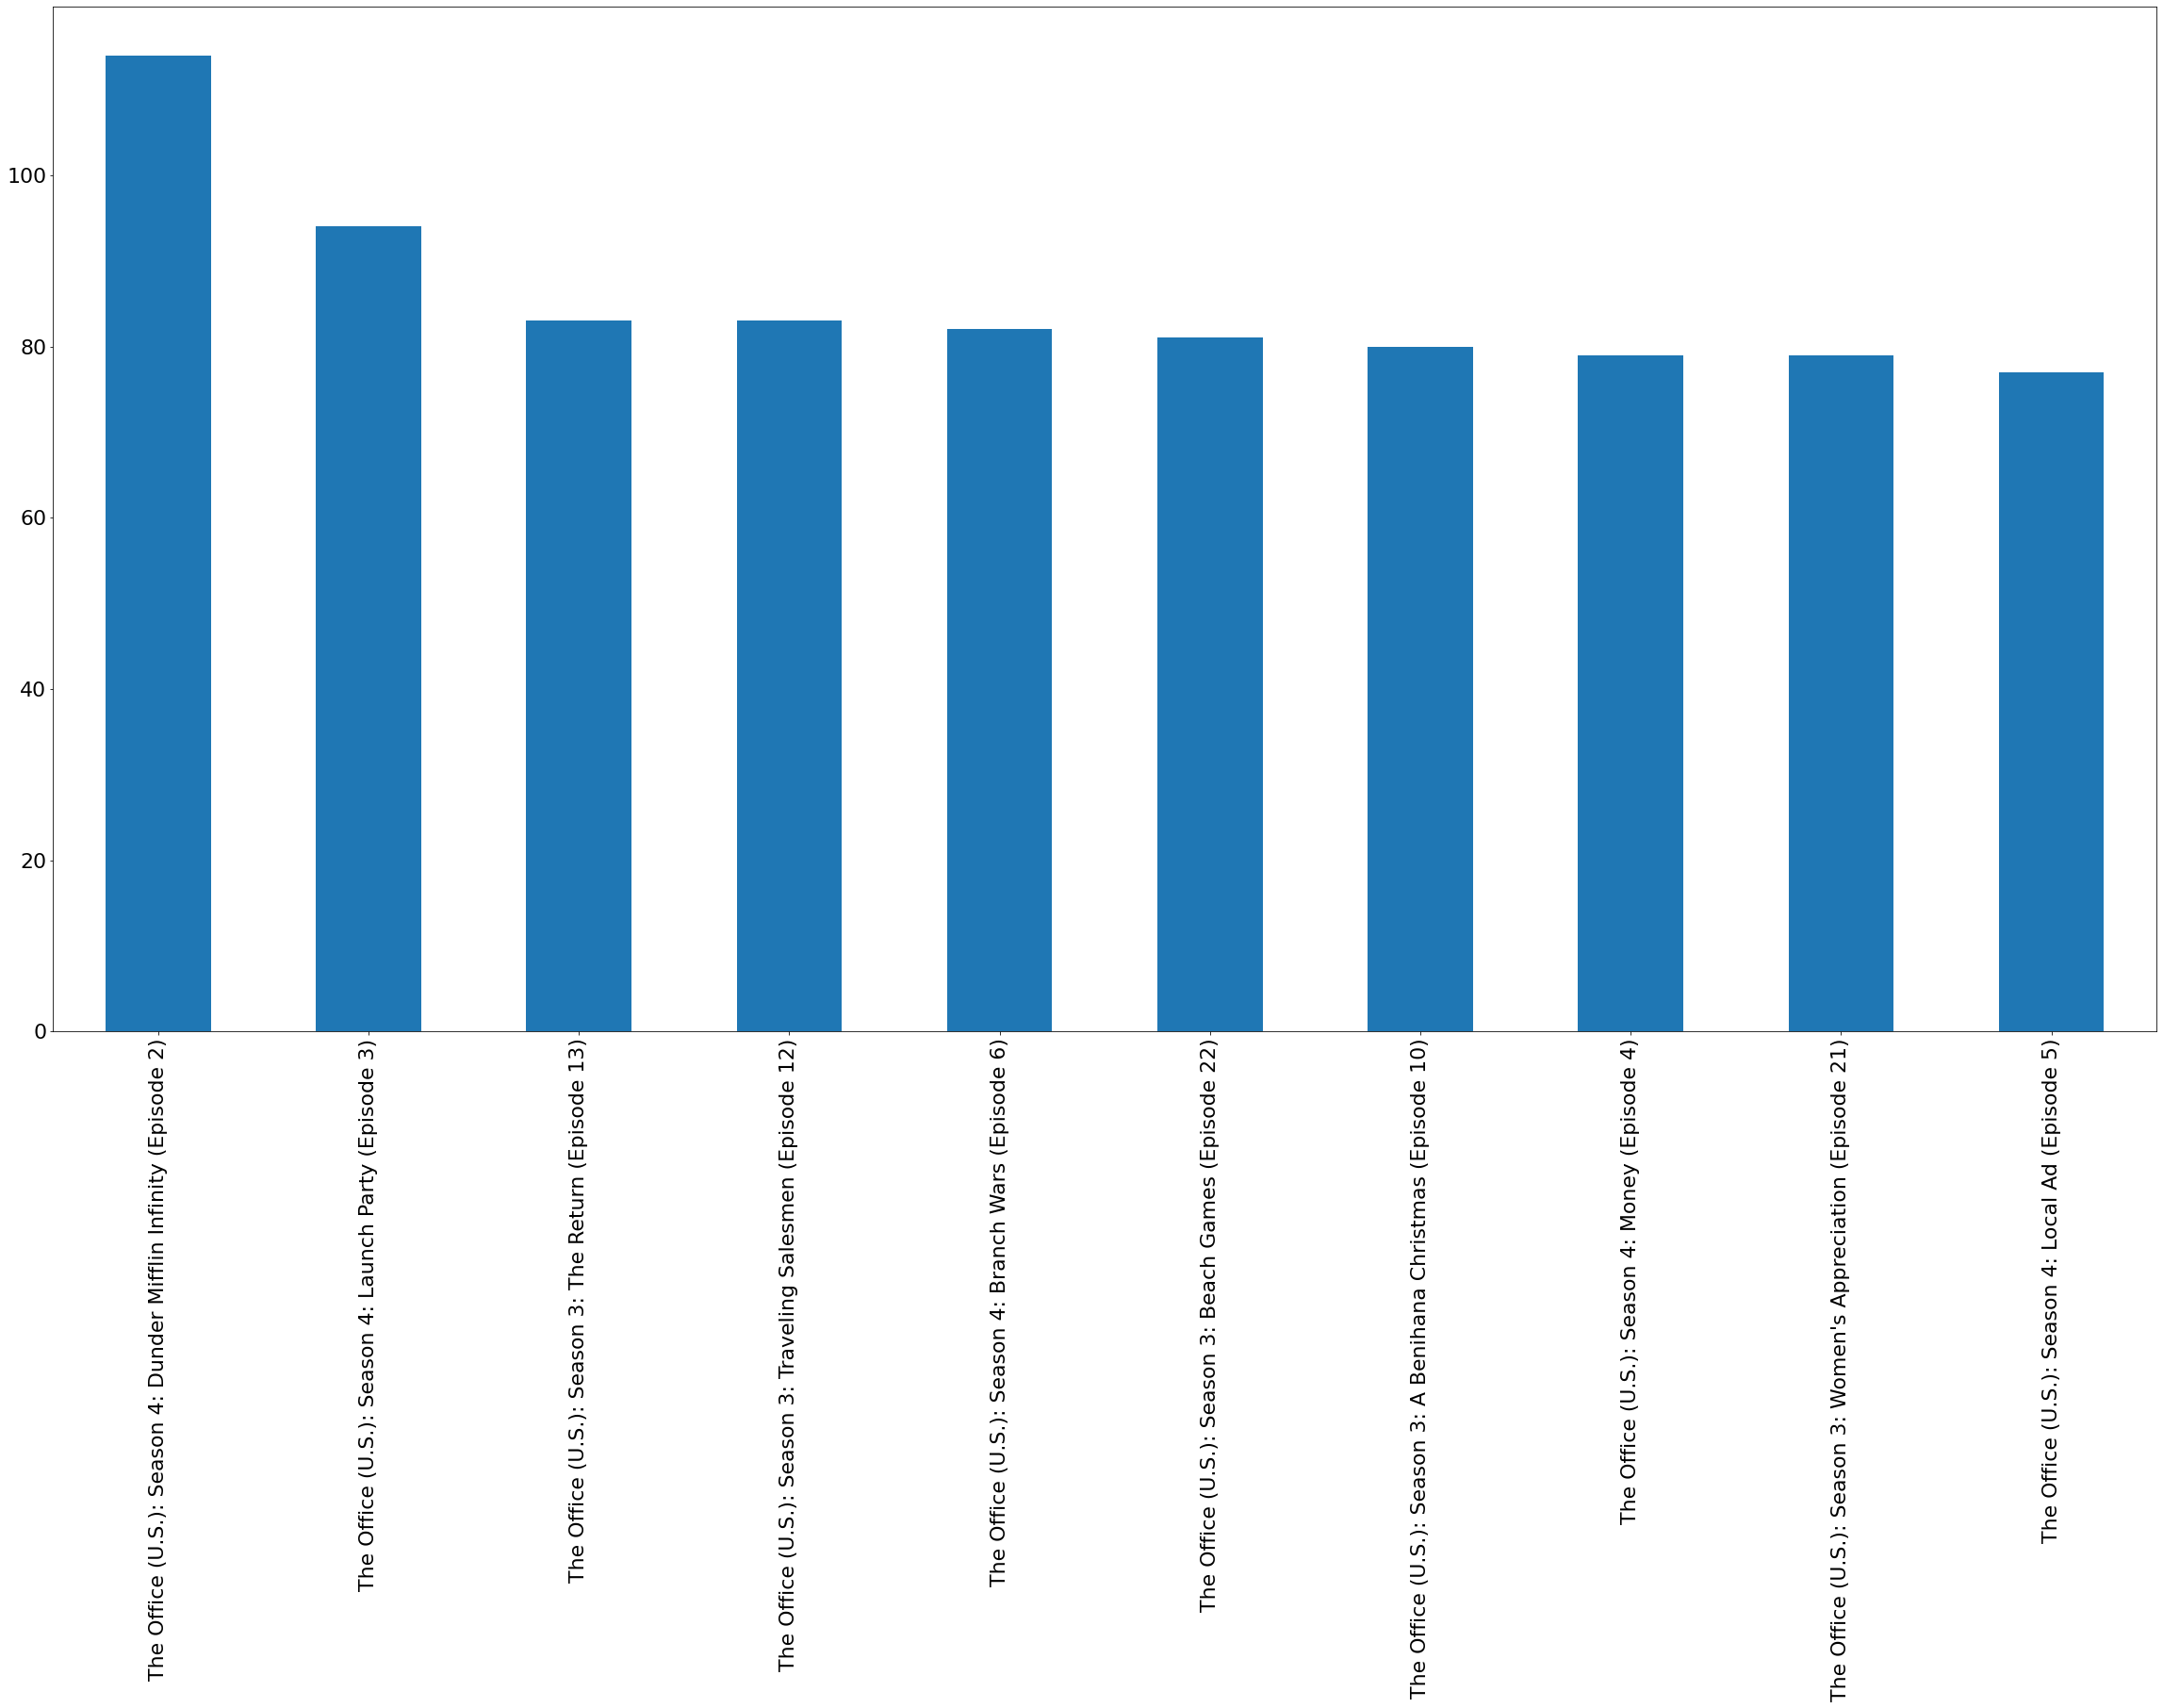

In [41]:
netflix['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

### All 10 were The Office episodes. This is embarrasing. We should be embarassed. 

### Atlhough, as we learned earlier, Zoo really isn't contributing much to the hours of The Office watched. It's okay, I'm sure her top 5 is much more sophisticasted then ours. Let's see what her most watched epsidode for any show on Netflix was:

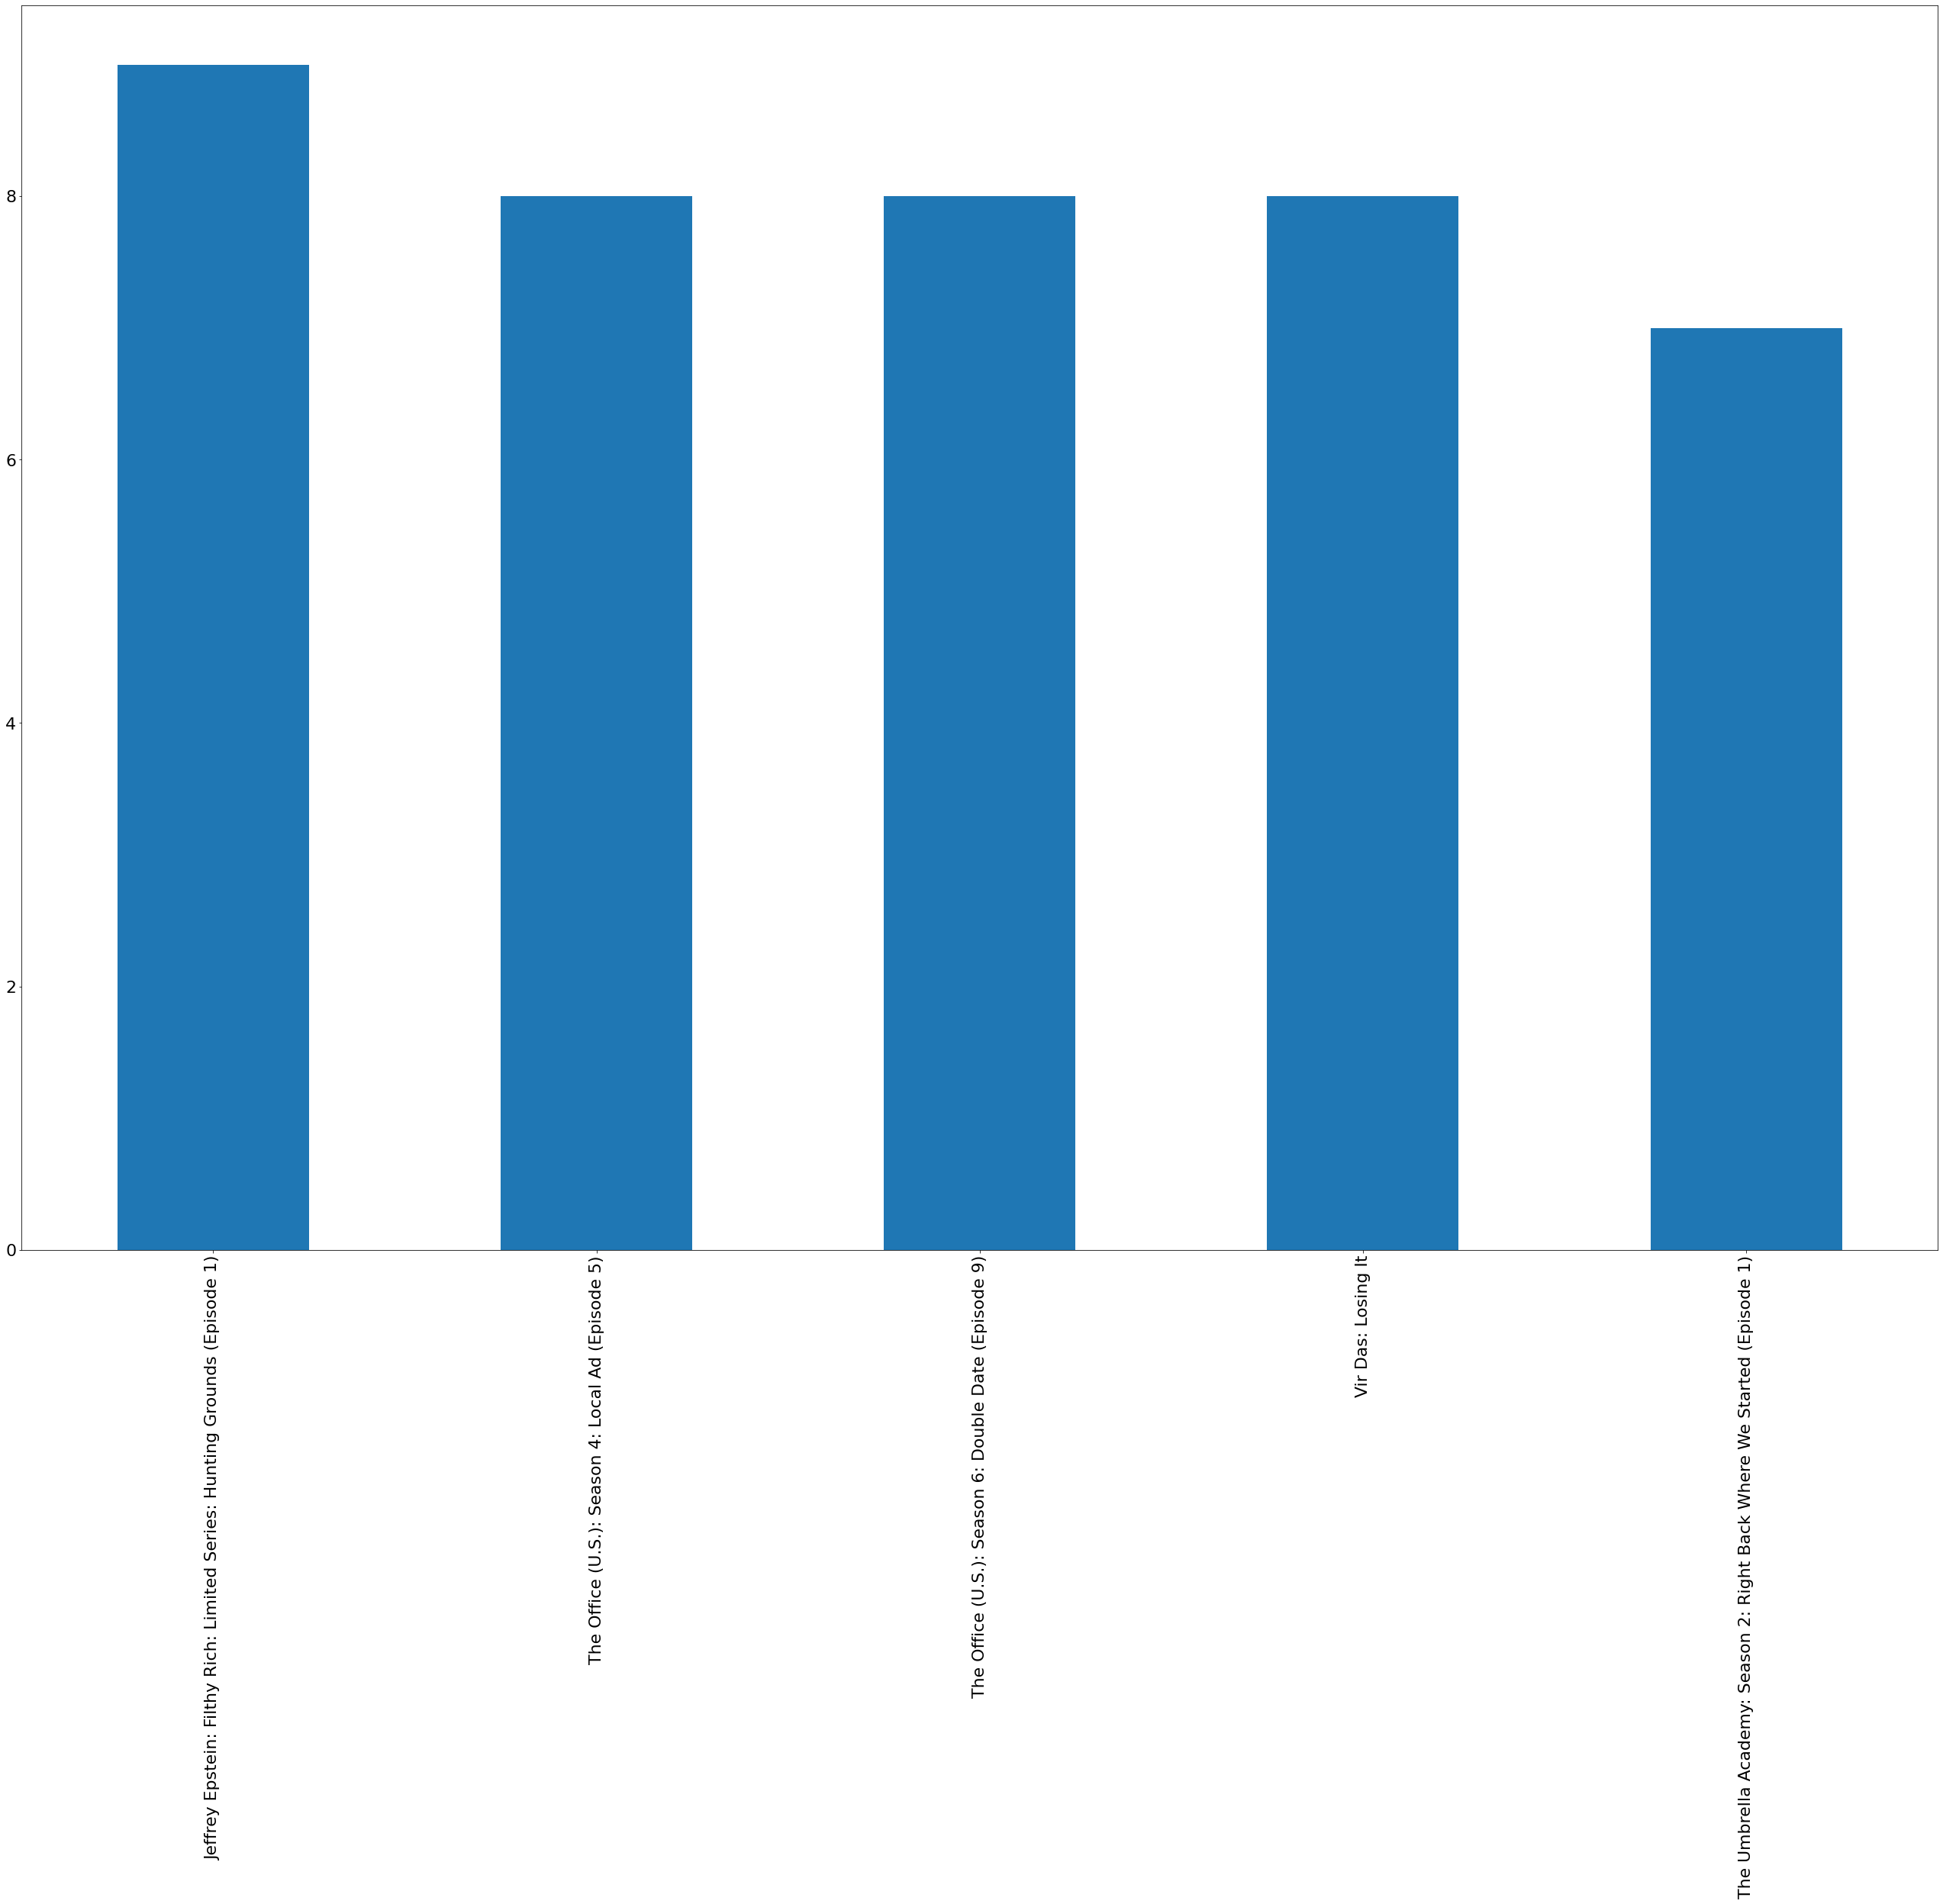

In [57]:
netflix_arzu = netflix[(netflix['Profile Name'] == "Arzu")]

netflix_arzu['Title'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(45,30))

### In case you have to squint, that first one says "Jeffery Epstein: Filthy Rich". Watched 9 times. Yikes

<div style="width:75%;height:0;padding-bottom:58%;position:relative;"><iframe src="https://giphy.com/embed/7VHV66bRjGRSo" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/7VHV66bRjGRSo">via GIPHY</a></p>

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/orq7T0pctbZRpdhxcN" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-the-office-tv-business-ethics-orq7T0pctbZRpdhxcN">via GIPHY</a></p>

### With that, I'll call it a day. Sorry for the unsolicited dive into your deepest and darkest viewing habits. If you want me to dive any further into this, I'd be more than happy to. The environment is all set up. It was hard to get into it, but once you're in, it's easy

<div style="width:75%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/ruZVTCF9l16xn9xfs3" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-nbc-the-office-tv-ruZVTCF9l16xn9xfs3">via GIPHY</a></p>

## Sorry guys. I had to. Merry Christmas!!